In [1]:
import os
import pkg_resources
pkg_resources.require("numpy>=`1.20.1")  #  to use specific numpy version
import numpy as np
import rsnapsim as rss
import sys
from sys import platform
from skimage import io ; from skimage.io import imread; from skimage.measure import find_contours
import pandas as pd
import os; from os import listdir; from os.path import isfile, join
import re
import shutil
import pathlib
from random import randrange
# Importing rSNAPsim_IP
import ipywidgets as widgets ; from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, VBox, Layout, GridspecLayout ; from IPython.display import Image

In [2]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.size'] = 15
plt.rcParams['axes.grid'] = False

In [3]:
# Deffining directories
current_dir = pathlib.Path().absolute()
sequences_dir = current_dir.parents[1].joinpath('DataBases','gene_files')
video_dir = current_dir.parents[1].joinpath('DataBases','videos_for_sim_cell')
rsnaped_dir = current_dir.parents[1].joinpath('rsnaped')

In [4]:
# Importing rSNAPsim_IP
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp

In [5]:
# gene files
gene_file_h2b = str(sequences_dir.joinpath('H2B_withTags.txt'))
gene_file_bact = str(sequences_dir.joinpath('Bactin_withTags.txt'))

In [6]:
list_files_names = sorted([f for f in listdir(video_dir) if isfile(join(video_dir, f)) and ('.tif') in f], key=str.lower)  # reading all tif files in the folder
list_files_names.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
path_files = [ str(video_dir.joinpath(f).resolve()) for f in list_files_names ] # creating the complete path for each file
num_cell_shapes = len(path_files)
sel_shape = randrange(num_cell_shapes)
video_path = path_files[sel_shape]

In [7]:
# Inputs
inial_video = io.imread(video_path) # video with empty cell
list_gene_sequences = [gene_file_h2b, gene_file_bact] # path to gene sequences
list_number_spots = [30, 30] # list of integers, where each element represents the number of spots
list_target_channels = [1, 1] # channel where the simulated spots will be located. 
list_diffusion_coefficients =[1, 1] # diffusion coefficients for each gene
list_label_names = ['a','b'] # list of strings used to generate a classification field in the output data frame

list_elongation_rates = [10, 10] # list of elongation rates (aa/sec)
list_initation_rates = [0.03, 0.03] # list of initiation rates (1/sec)

simulation_time_in_sec = 100
step_size_in_sec = 1
save_as_tif = 1 # option to save the simulated video
save_dataframe = 1 # option to save the simulation output as a dataframe in format csv. 
saved_file_name = 'simulated_cell' # if the video or dataframe are save, this variable assigns the name to the files
create_temp_folder = 1 # saves the video and data frame in a temp folder
save_as_gif = 1  # saves the video as .gif in a temp folder

In [8]:
tensor_video, dataframe_simulated_cell,list_ssa = rsp.SimulatedCellMultiplexing(inial_video,list_gene_sequences,list_number_spots,list_target_channels,list_diffusion_coefficients,list_label_names,list_elongation_rates,list_initation_rates,simulation_time_in_sec,step_size_in_sec,save_as_tif, save_dataframe, saved_file_name,create_temp_folder,cell_number =0,save_as_gif=save_as_gif).make_simulation()

The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp
The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp
The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp
The output is saved in the directory:  /home/luisub/Desktop/rsnaped/notebooks/Machine_Learning/temp


In [9]:
# Plot only selected trajectories
plt.rcParams['figure.figsize'] = [5,5]
#controls_pr, output_pr = rsp.VisualizerVideo(tensor_video,dataframe_particles=dataframe_simulated_cell,normalize=False).make_video_app()
controls_pr, output_pr = rsp.VisualizerVideo(tensor_video,normalize=False,step_size_in_sec=step_size_in_sec).make_video_app()
display(VBox([controls_pr, output_pr]))

In [10]:
dataframe_simulated_cell

,cell_number,particle,frame,red_int_mean,green_int_mean,blue_int_mean,red_int_std,green_int_std,blue_int_std,x,y,Classification
0,0,0,0,288.0,605.0,0.0,23.319142,144.227132,0.0,257.0,178.0,a
1,0,0,1,1452.0,632.0,0.0,376.137388,150.655188,0.0,259.0,178.0,a
2,0,0,2,586.5,617.0,0.0,124.533690,147.535899,0.0,261.0,174.0,a
3,0,0,3,816.0,611.0,0.0,207.355370,147.434791,0.0,261.0,174.0,a
4,0,0,4,807.0,610.5,0.0,209.566959,147.191608,0.0,261.0,174.0,a
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,59,95,616.0,234.5,0.0,139.450923,12.737347,0.0,320.0,192.0,b
2996,0,59,96,1075.0,246.0,0.0,287.200156,13.129265,0.0,317.0,193.0,b
2997,0,59,97,394.0,229.0,0.0,57.482157,12.933306,0.0,316.0,193.0,b
2998,0,59,98,1526.5,239.0,0.0,399.474383,13.129265,0.0,316.0,196.0,b


## Plotting time courses for gene 1

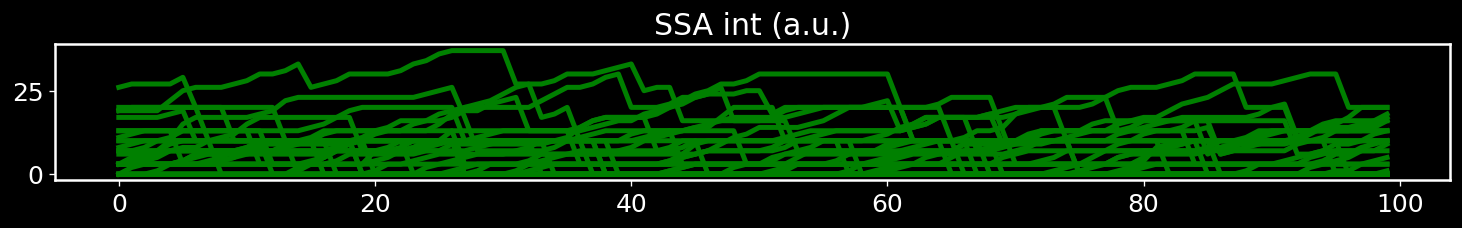

In [11]:
plt.figure(figsize=(15,1.5))
for tr in range(0,list_ssa[0].shape[0] ):
    plt.plot(list_ssa[0][tr,:] , '-',linewidth = 3,color='green');
plt.title('SSA int (a.u.)')
plt.show()

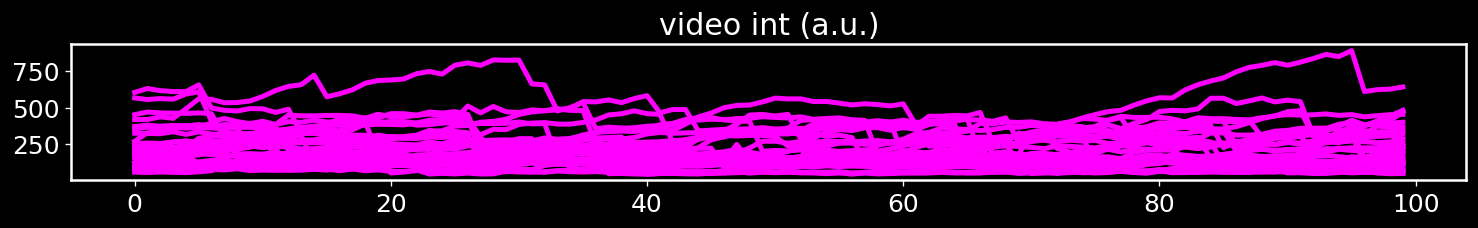

In [12]:
plt.figure(figsize=(15,1.5))
for i in range(0,len(list_gene_sequences)):
    for j in range (0,list_number_spots[i]):
        if i >0:
            spot_num_counter = j + list_number_spots[0]
        else:
            spot_num_counter = j
        plt.plot (dataframe_simulated_cell.loc[(dataframe_simulated_cell['Classification']=='a') &  (dataframe_simulated_cell['particle']==spot_num_counter)].green_int_mean.values[:] ,linewidth = 3,color='magenta' )      
plt.title('video int (a.u.)')
plt.show()

## Plotting time courses for gene 2

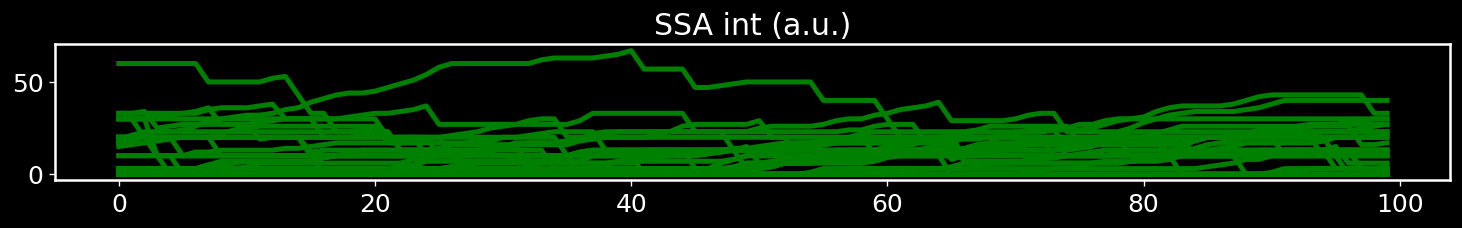

In [13]:
plt.figure(figsize=(15,1.5))
for tr in range(0,list_ssa[1].shape[0] ):
    plt.plot(list_ssa[1][tr,:] , '-',linewidth = 3,color='green');
plt.title('SSA int (a.u.)')
plt.show()

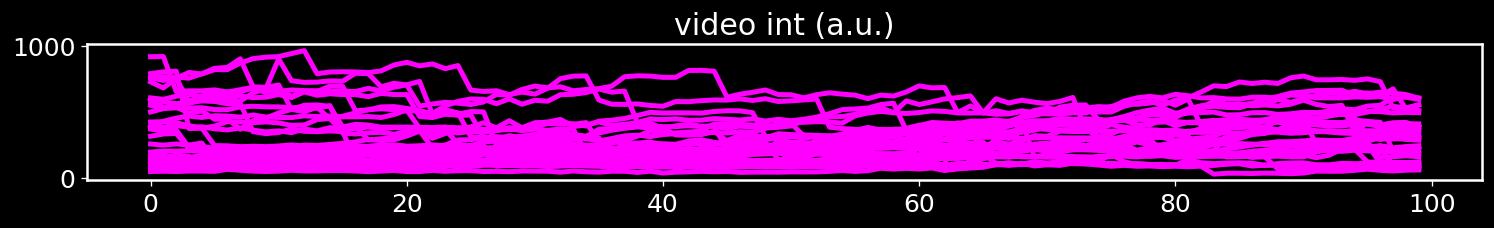

In [14]:
plt.figure(figsize=(15,1.5))
for i in range(0,len(list_gene_sequences)):
    for j in range (0,list_number_spots[i]):
        if i >0:
            spot_num_counter = j + list_number_spots[0] # this is just a counter for that creates the spot number based on list_number_spots
        else:
            spot_num_counter = j
        plt.plot (dataframe_simulated_cell.loc[(dataframe_simulated_cell['Classification']=='b') &  (dataframe_simulated_cell['particle']==spot_num_counter)].green_int_mean.values[:] ,linewidth = 3,color='magenta' )   
plt.title('video int (a.u.)')
plt.show()